In [71]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import gcf
import seaborn as sns
import scipy.stats
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize
from scipy import stats
import urllib.request
import mdtraj as md
import scipy as sp
import math
sns.set_style("darkgrid")


## P61626

In [72]:
# Load data
DATA_PATH_MUT_ESM_rec1 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P61626/P61626_rec1_MUT/'
DATA_PATH_MUT_ESM_rec3 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P61626/P61626_rec3_MUT/'
DATA_PATH_WT_ESM_rec1 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P61626/P61626_rec1_WT/'
DATA_PATH_WT_ESM_rec3 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P61626/P61626_rec3_WT/'

mut_esm_rec1_rmsds = list() 
mut_esm_rec3_rmsds = list()
wt_esm_rec1_rmsds = list()
wt_esm_rec3_rmsds = list()
list_dir = sorted(os.listdir(DATA_PATH_MUT_ESM_rec1))
for file in list_dir:
    # MUT_ESM_rec1
    df_mut_esm_rec1 = pd.read_csv(DATA_PATH_MUT_ESM_rec1 + file)
    mut_esm_rec1_rmsds.append(df_mut_esm_rec1['rmsd'][0])
    
    # MUT_ESM_rec3
    df_mut_esm_rec3 = pd.read_csv(DATA_PATH_MUT_ESM_rec3 + file)
    mut_esm_rec3_rmsds.append(df_mut_esm_rec3['rmsd'][0])
    
    # WT_ESM_rec1
    df_wt_esm_rec1 = pd.read_csv(DATA_PATH_WT_ESM_rec1 + file)
    wt_esm_rec1_rmsds.append(df_wt_esm_rec1['rmsd'][0])
    
    # WT_ESM_rec3
    df_wt_esm_rec3 = pd.read_csv(DATA_PATH_WT_ESM_rec3 + file)
    wt_esm_rec3_rmsds.append(df_wt_esm_rec3['rmsd'][0])

In [73]:
# Load data
DATA_PATH_MUT_AF2 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_af2/results_rmsd_P61626_mut2mut/'
DATA_PATH_WT_AF2 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_af2/results_rmsd_P61626_mut2wt/'
DATA_PATH_PDB = '/Users/holger/Desktop/master_thesis/data/arodz12/pdbs_P61626/'
DATA_PATH_AF2 = '/Users/holger/Desktop/master_thesis/data/results_af2/P61626/'
arodz_pdbs = ['1gb5', '1gb6', '1gb7', '1gb8', '1gb9', '1gbo', '1gbw', '1gbx', '1gby', '1gbz', '1gfh', '1gfj', '1gfk', '1gfr', '1gft', '1gfu','1gfv', '1inu', '1lhh', '1lhi', '1lhj', '1lhk', '1lhl', '1oub','1ouc', '1oud', '1oue', '1ouh', '1oui', '1ouj', '1wqm', '1wqn','1wqo', '1wqp', '1wqq', '1wqr', '1yam', '1yan', '1yao', '1yap','1yaq', '2hea', '2heb', '2hec', '2hed', '2hee', '2hef']

# AF2 muts to X-ray WT
af2_wt_rmsd_list = np.zeros((5,47))
dir_list = sorted(os.listdir(DATA_PATH_WT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_wt_rmsd_list.shape[0]):
        af2_wt_rmsd_list[idx,j] = ls[idx]
        
wt_esm_rec1_rmsds = np.reshape(wt_esm_rec1_rmsds, (1,47))
af2_wt_rmsd_list = np.vstack((af2_wt_rmsd_list,wt_esm_rec1_rmsds))
af2_wt_rmsd_list = np.asarray(af2_wt_rmsd_list)

wt_esm_rec3_rmsds = np.reshape(wt_esm_rec3_rmsds, (1,47))
af2_wt_rmsd_list = np.vstack((af2_wt_rmsd_list,wt_esm_rec3_rmsds))


# AF2 muts to X-ray muts
af2_mut_rmsd_list = np.zeros((5,47))
dir_list = sorted(os.listdir(DATA_PATH_MUT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_mut_rmsd_list.shape[0]):
        af2_mut_rmsd_list[idx,j] = ls[idx]

mut_esm_rec1_rmsds = np.reshape(mut_esm_rec1_rmsds, (1,47))
af2_mut_rmsd_list = np.vstack((af2_mut_rmsd_list,mut_esm_rec1_rmsds))
af2_mut_rmsd_list = np.asarray(af2_mut_rmsd_list)

print(mut_esm_rec1_rmsds)
mut_esm_rec3_rmsds = np.reshape(mut_esm_rec3_rmsds, (1,47))
af2_mut_rmsd_list = np.vstack((af2_mut_rmsd_list,mut_esm_rec3_rmsds))

print(mut_esm_rec3_rmsds)

[[0.46210174 0.43397575 0.44737621 0.44118087 0.43859728 0.39675308
  0.44163265 0.44673195 0.46800327 0.50856641 0.44705703 0.43561756
  0.42148701 0.42826983 0.52515368 0.46405183 0.42013228 0.44182521
  0.44995061 0.47113923 0.68300945 0.45136092 0.4440483  0.46633056
  0.44112897 0.47260801 0.45549359 0.45159155 0.45133835 0.45996186
  0.44489176 0.44774849 0.45336361 0.4438372  0.45328389 0.45301822
  0.47097355 0.43981845 0.44081292 0.46158924 0.45267865 0.45078963
  0.44263596 0.44578181 0.4219512  0.45169098 0.48272162]]
[[0.46210174 0.43397575 0.44737621 0.44118087 0.43859728 0.39675308
  0.44163265 0.44673195 0.46800327 0.50856641 0.44705703 0.43561756
  0.42148701 0.42826983 0.52515368 0.46405183 0.42013228 0.44182521
  0.44995061 0.47113923 0.68300945 0.45136092 0.4440483  0.46633056
  0.44112897 0.47260801 0.45549359 0.45159155 0.45133835 0.45996186
  0.44489176 0.44774849 0.45336361 0.4438372  0.45328389 0.45301822
  0.47097355 0.43981845 0.44081292 0.46158924 0.45267865 

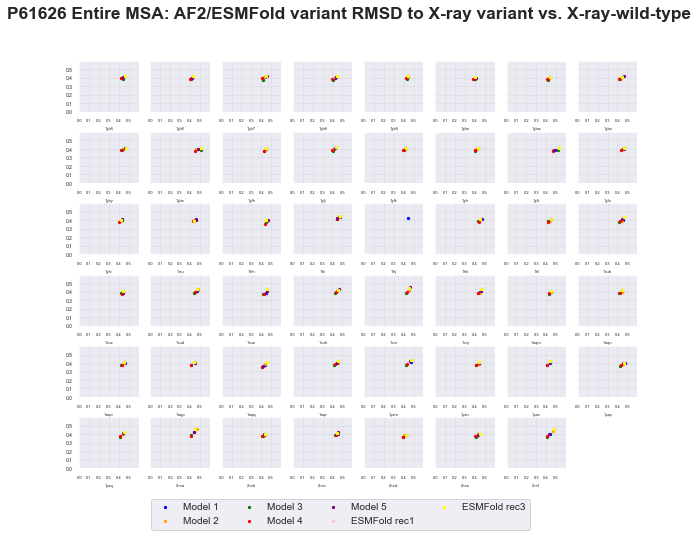

In [74]:
# Scatter plots of AF2 data vs. X-ray
N, M = af2_mut_rmsd_list.shape

colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow']
modelnames = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'ESMFold rec1', 'ESMFold rec3']
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
plt.subplots(figsize = (10,7.5))
plt.subplots_adjust(hspace = 0.4)


for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 0.6, 0.1))
    ax.set_yticks(np.arange(0, 0.6, 0.1))
    plt.grid(axis="both", color = "lightgrey", alpha=0.5)
    for j in range(N):
        plt.scatter(af2_mut_rmsd_list[j,i], af2_wt_rmsd_list[j,i], color = colors[j], label = modelnames[j], s=5)
        plt.xlabel(arodz_pdbs[i], fontsize=4)
        plt.yticks(fontsize=5)
        plt.xticks(fontsize=4)
        plt.xlim(0,0.6)
        plt.ylim(0, 0.6)
    # Remove axis labels and tick for subplots not in left column
    if i % v != 0:
        ax = plt.gca()
        ax.set_xticks(np.arange(0, 0.6, 0.1))
        ax.set_yticks(np.arange(0, 0.6, 0.1))
        plt.grid(axis="both", color = "lightgrey", alpha=0.5)
        ax.tick_params(axis='y', colors=(0,0,0,0))

plt.legend(bbox_to_anchor=(-2.8, -0.5), loc='upper center', ncol=4)
plt.suptitle("P61626 Entire MSA: AF2/ESMFold variant RMSD to X-ray variant vs. X-ray-wild-type", fontsize = "xx-large", fontweight ="bold")
plt.savefig("/Users/holger/Desktop/master_thesis/notebooks/figs/af_models_var_xray_vs_xray_wt_P61626.pdf")

In [75]:
# Load data
DATA_PATH_MUT_ESM_rec1 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P00720/P00720_rec1_MUT/'
DATA_PATH_MUT_ESM_rec3 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P00720/P00720_rec3_MUT/'
DATA_PATH_WT_ESM_rec1 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P00720/P00720_rec1_WT/'
DATA_PATH_WT_ESM_rec3 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_esmfold/P00720/P00720_rec3_WT/'

mut_esm_rec1_rmsds = list() 
mut_esm_rec3_rmsds = list()
wt_esm_rec1_rmsds = list()
wt_esm_rec3_rmsds = list()
list_dir = sorted(os.listdir(DATA_PATH_MUT_ESM_rec1))
for file in list_dir:
    # MUT_ESM_rec1
    df_mut_esm_rec1 = pd.read_csv(DATA_PATH_MUT_ESM_rec1 + file)
    mut_esm_rec1_rmsds.append(df_mut_esm_rec1['rmsd'][0])
    
    # MUT_ESM_rec3
    df_mut_esm_rec3 = pd.read_csv(DATA_PATH_MUT_ESM_rec3 + file)
    mut_esm_rec3_rmsds.append(df_mut_esm_rec3['rmsd'][0])
    
    # WT_ESM_rec1
    df_wt_esm_rec1 = pd.read_csv(DATA_PATH_WT_ESM_rec1 + file)
    wt_esm_rec1_rmsds.append(df_wt_esm_rec1['rmsd'][0])
    
    # WT_ESM_rec3
    df_wt_esm_rec3 = pd.read_csv(DATA_PATH_WT_ESM_rec3 + file)
    wt_esm_rec3_rmsds.append(df_wt_esm_rec3['rmsd'][0])

## P00720

In [76]:
DATA_PATH_WT_AF2 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_af2/results_rmsd_P00720_mut2mut/'
DATA_PATH_MUT_AF2 = '/Users/holger/Desktop/master_thesis/data/results_rmsd/results_rmsd_af2/results_rmsd_P00720_mut2wt/'
DATA_PATH_PDB = '/Users/holger/Desktop/master_thesis/data/arodz12/pdbs_P00720/'
DATA_PATH_AF2 = '/Users/holger/Desktop/master_thesis/data/results_af2/P00720/'
arodz_pdbs = ['1dya', '1dyb', '1dyc', '1dyd', '1dye', '1dyf', '1dyg', '1l00','1l02', '1l03', '1l05', '1l06', '1l07', '1l08', '1l09', '1l10','1l11', '1l12', '1l13', '1l14', '1l15', '1l16', '1l19', '1l20','1l21', '1l22', '1l23', '1l24', '1l25', '1l26', '1l27', '1l28','1l29', '1l30', '1l31', '1l32', '1l33', '1l34', '1l37', '1l38','1l44', '1l45', '1l46', '1l47', '1l48', '1l52', '1l53', '1l56','1l57', '1l58', '1l60', '1l69', '1l98', '1l99']


# AF2 muts to X-ray WT
af2_wt_rmsd_list = np.zeros((5,54))
dir_list = sorted(os.listdir(DATA_PATH_WT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_WT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_wt_rmsd_list.shape[0]):
        af2_wt_rmsd_list[idx,j] = ls[idx]

wt_esm_rec1_rmsds = np.reshape(wt_esm_rec1_rmsds, (1,54))
af2_wt_rmsd_list = np.vstack((af2_wt_rmsd_list,wt_esm_rec1_rmsds))
af2_wt_rmsd_list = np.asarray(af2_wt_rmsd_list)

wt_esm_rec3_rmsds = np.reshape(wt_esm_rec3_rmsds, (1,54))
af2_wt_rmsd_list = np.vstack((af2_wt_rmsd_list,wt_esm_rec3_rmsds))

# AF2 muts to X-ray muts
af2_mut_rmsd_list = np.zeros((5,54))
dir_list = sorted(os.listdir(DATA_PATH_MUT_AF2))
for j in range(len(dir_list)):
    df_tmp = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])['name']
    df_tmp2 = pd.read_csv(DATA_PATH_MUT_AF2 + dir_list[j])
    df_tmp2['model_n'] = list(df_tmp.str.extract(r'(model_)(\d)').iloc[:,1])
    df_tmp2 = df_tmp2.sort_values('model_n')
    ls = np.asarray(list(df_tmp2['rmsd']))
    for idx in range(af2_mut_rmsd_list.shape[0]):
        af2_mut_rmsd_list[idx,j] = ls[idx]

mut_esm_rec1_rmsds = np.reshape(mut_esm_rec1_rmsds, (1,54))
af2_mut_rmsd_list = np.vstack((af2_mut_rmsd_list,mut_esm_rec1_rmsds))
af2_mut_rmsd_list = np.asarray(af2_mut_rmsd_list)

mut_esm_rec3_rmsds = np.reshape(mut_esm_rec3_rmsds, (1,54))
af2_mut_rmsd_list = np.vstack((af2_mut_rmsd_list,mut_esm_rec3_rmsds))

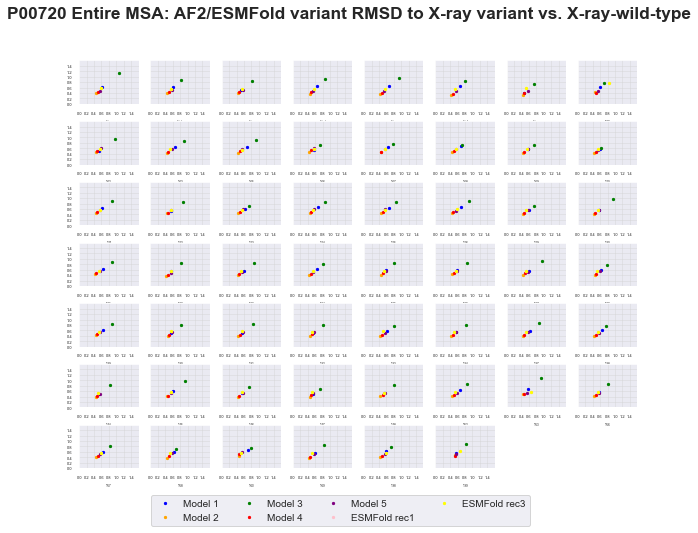

In [77]:
# Scatter plots of AF2 data vs. X-ray
N, M = af2_mut_rmsd_list.shape

colors = ['blue', 'orange', 'green', 'red', 'purple', 'pink', 'yellow']
modelnames = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'ESMFold rec1', 'ESMFold rec3']
u = np.floor(np.sqrt(M))
v = np.ceil(float(M) / u)
plt.subplots(figsize = (10,7.5))
plt.subplots_adjust(hspace = 0.4)


for i in range(M):
    plt.subplot(int(u), int(v), i + 1)
    ax = plt.gca()
    ax.set_xticks(np.arange(0, 1.6, 0.2))
    ax.set_yticks(np.arange(0, 1.6, 0.2))
    plt.xlim(0,1.6)
    plt.ylim(0,1.6)
    plt.grid(axis="both", color = "lightgrey", alpha=0.5)
    for j in range(N):
        plt.scatter(af2_mut_rmsd_list[j,i], af2_wt_rmsd_list[j,i], color = colors[j], label = modelnames[j], s=5)
        plt.xlabel(arodz_pdbs[i], fontsize=3)
        plt.yticks(fontsize=4)
        plt.xticks(fontsize=4)
        plt.xlim(0,1.6)
        plt.ylim(0,1.6)
    # Remove axis labels and tick for subplots not in left column
    if i % v != 0:
        ax = plt.gca()
        ax.set_xticks(np.arange(0, 1.6, 0.2))
        ax.set_yticks(np.arange(0, 1.6, 0.2))
        plt.grid(axis="both", color = "lightgrey", alpha=0.5)
        ax.tick_params(axis='y', colors=(0,0,0,0))

plt.legend(bbox_to_anchor=(-1.6, -0.5), loc='upper center', ncol=4)
plt.suptitle("P00720 Entire MSA: AF2/ESMFold variant RMSD to X-ray variant vs. X-ray-wild-type", fontsize = "xx-large", fontweight ="bold")
plt.savefig("/Users/holger/Desktop/master_thesis/notebooks/figs/af_models_vs_xray_mut_P00720.pdf")

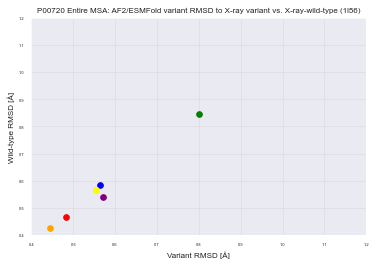

In [94]:
for j in range(N):
    plt.scatter(af2_mut_rmsd_list[j,-7], af2_wt_rmsd_list[j,-7], color = colors[j], label = modelnames[j], s=32)
    plt.xlabel(arodz_pdbs[i], fontsize=3)
    plt.yticks(fontsize=4)
    plt.xticks(fontsize=4)
    plt.xlim(0.4,1.2)
    plt.ylim(0.4,1.2)
    plt.ylabel('Wild-type RMSD [Å]',fontsize=8)
    plt.xlabel('Variant RMSD [Å]',fontsize=8)
    plt.grid(axis="both", color = "lightgrey", alpha=0.5)
    plt.title('P00720 Entire MSA: AF2/ESMFold variant RMSD to X-ray variant vs. X-ray-wild-type (1l56)',fontsize=8)
plt.savefig("/Users/holger/Desktop/master_thesis/notebooks/figs/af_models_vs_xray_mut_P00720_1l56.pdf")